<a href="https://colab.research.google.com/github/Soot3/11-financial-products/blob/master/EDA_financial_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
# Importing python packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
style.use('ggplot')
sns.set_context("poster")
sns.color_palette("Paired")
import holidays

In [130]:
dataset = pd.read_csv('https://media.githubusercontent.com/media/HamoyeHQ/11-financial-products/master/data/consumer_complaints.csv', low_memory=False)

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [132]:
dataset.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [133]:
# Cleaning and Fomatting dataset
dataset.fillna(value='Missing',inplace=True)
dataset['date_received'] = pd.to_datetime(dataset.date_received)
dataset['date_sent_to_company'] = pd.to_datetime(dataset.date_sent_to_company)
dataset['year_received'] = pd.DatetimeIndex(dataset['date_received']).year
dataset['month_received'] = pd.DatetimeIndex(dataset['date_received']).month
dataset.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year_received,month_received
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Missing,Missing,Missing,U.S. Bancorp,CA,95993,Missing,Missing,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,2013,8
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Missing,Missing,Missing,Wells Fargo & Company,CA,91104,Missing,Missing,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,2013,8
2,2013-08-30,Credit reporting,Missing,Incorrect information on credit report,Account status,Missing,Missing,Wells Fargo & Company,NY,11764,Missing,Missing,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,2013,8
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,Missing,Missing,"Navient Solutions, Inc.",MD,21402,Missing,Missing,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,2013,8
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,Missing,Missing,Resurgent Capital Services L.P.,GA,30106,Missing,Missing,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,2013,8


## Exploring the Columns

Text(0.5, 1.0, 'Ten Companies with the Highest Number of Complaints')

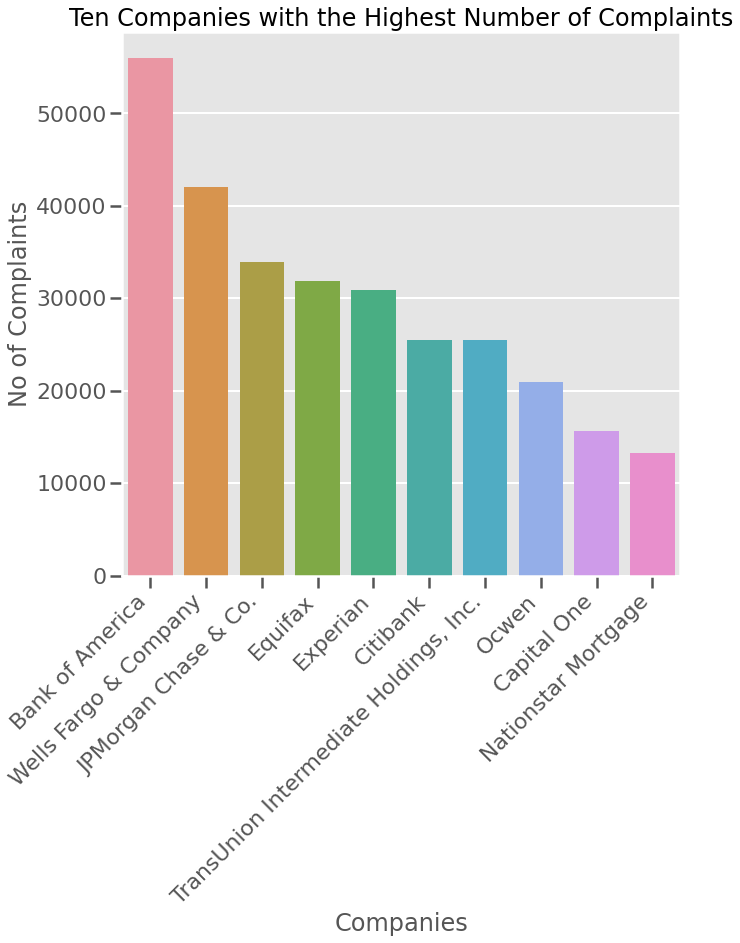

In [134]:
plot_order = dataset.groupby(['company'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='company',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Companies')
chart.set_title('Ten Companies with the Highest Number of Complaints')

Text(0.5, 1.0, 'Financial Products with the Highest number of complaints')

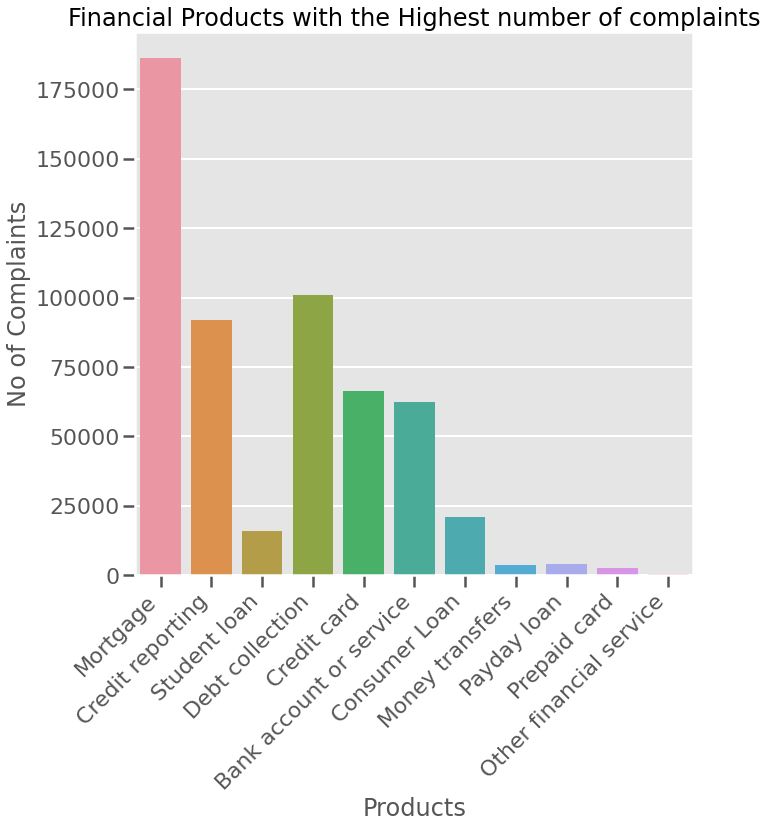

In [135]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='product')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Products')
chart.set_title('Financial Products with the Highest number of complaints')

Text(0.5, 1.0, 'No of Complaints in Each Mortgage Sub Product')

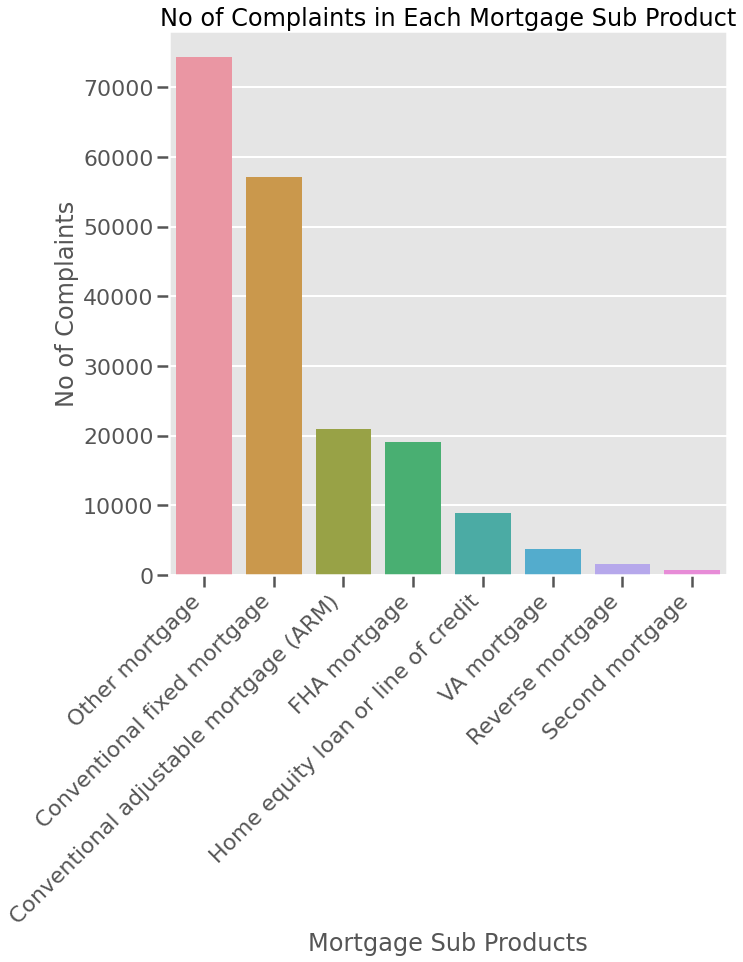

In [171]:
dataset_m = dataset[dataset['product'] == 'Mortgage']
plot_order = dataset_m.groupby(['sub_product'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset_m, x='sub_product',order=plot_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Mortgage Sub Products')
chart.set_title('No of Complaints in Each Mortgage Sub Product')

Text(0.5, 1.0, 'Top 10 Issues with the Most complaints')

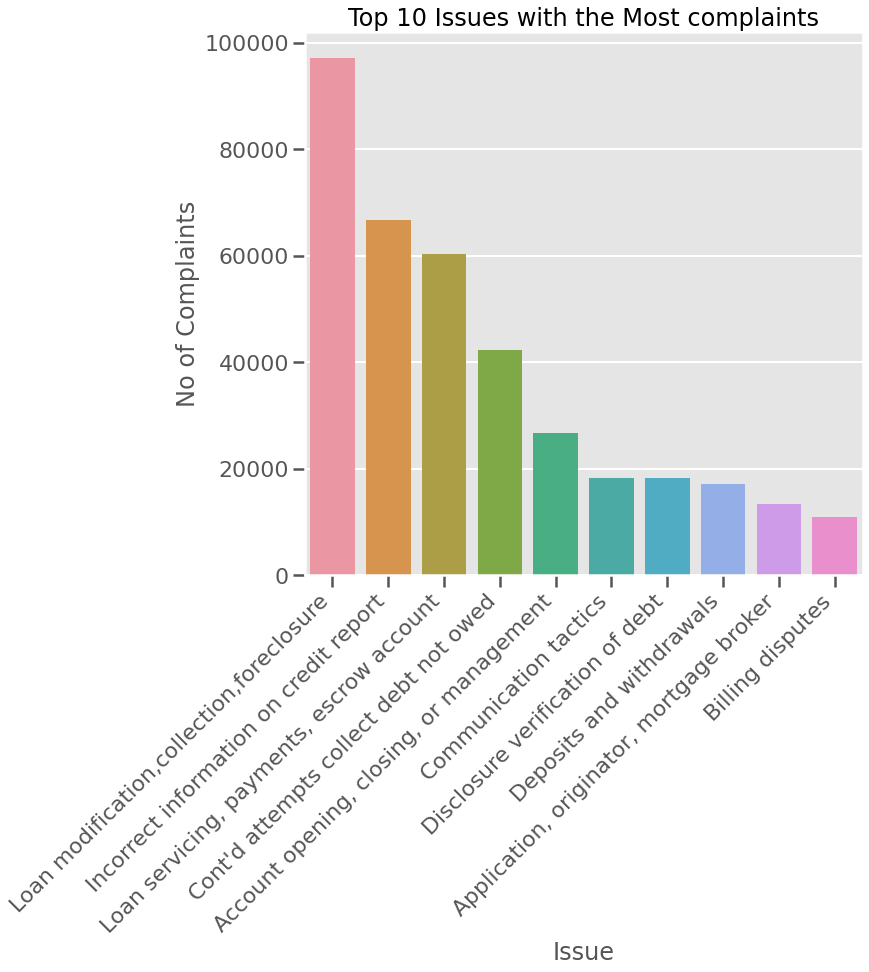

In [136]:
plot_order = dataset.groupby(['issue'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='issue',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Issue')
chart.set_title('Top 10 Issues with the Most complaints')

Text(0.5, 1.0, 'Number of complaints for each submission method')

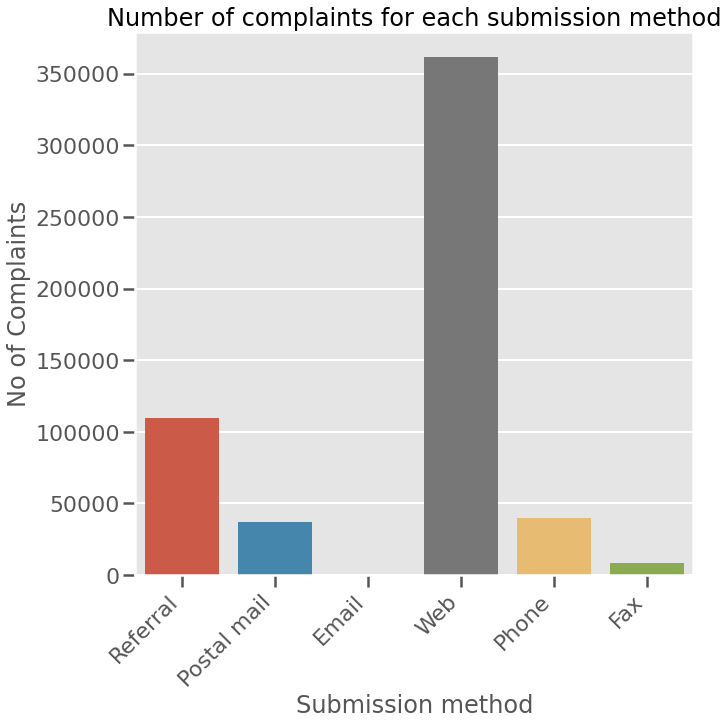

In [137]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='submitted_via')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Submission method')
chart.set_title('Number of complaints for each submission method')

Text(0.5, 1.0, 'Frequency of the various companies responses')

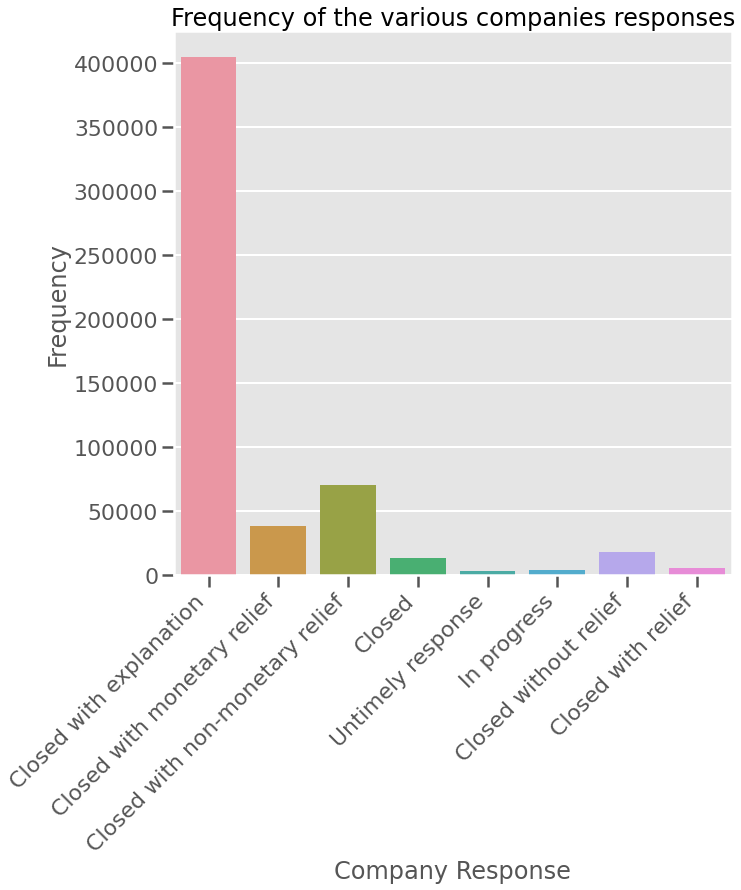

In [138]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='company_response_to_consumer')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Frequency')
chart.set_xlabel('Company Response')
chart.set_title('Frequency of the various companies responses')

Text(0.5, 1.0, 'Number of complaints received in each year')

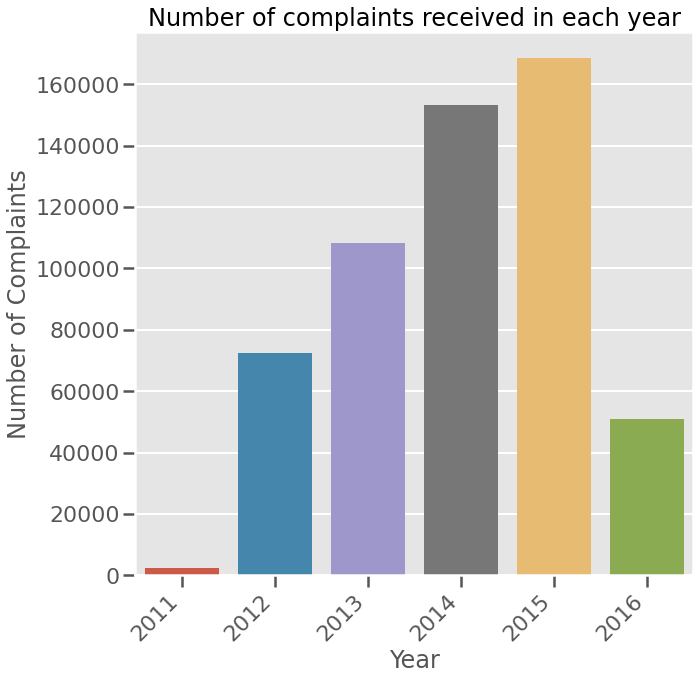

In [139]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='year_received')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Number of Complaints')
chart.set_xlabel('Year')
chart.set_title('Number of complaints received in each year')

Text(0.5, 1.0, 'Number of complaints received in each month')

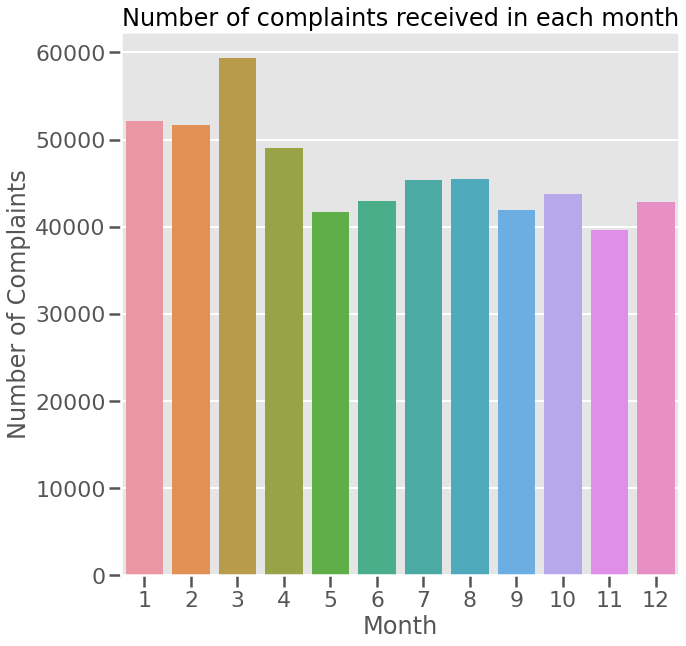

In [140]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='month_received')
chart.set_ylabel('Number of Complaints')
chart.set_xlabel('Month')
chart.set_title('Number of complaints received in each month')

Text(0.5, 1.0, 'Number of complaints for each state')

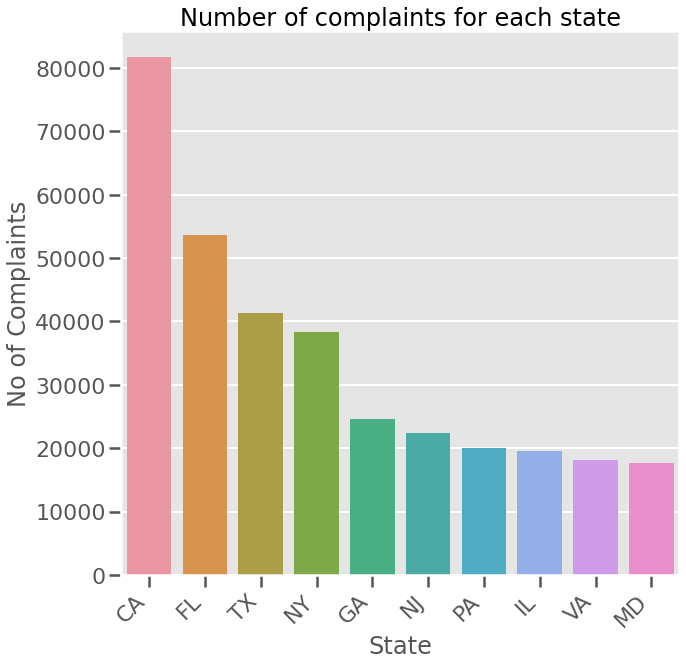

In [141]:
plot_order = dataset.groupby(['state'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='state',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('State')
chart.set_title('Number of complaints for each state')

Text(0.5, 1.0, 'Number of disputed complaints for each financial product')

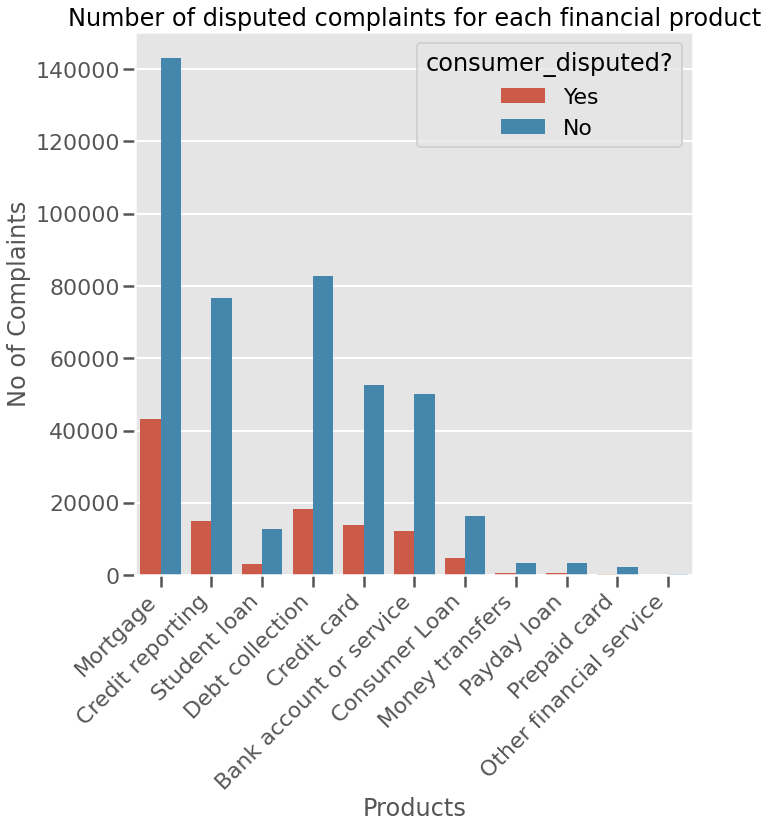

In [142]:
# Visualizing Consumer disputes
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='product', hue='consumer_disputed?')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Products')
chart.set_title('Number of disputed complaints for each financial product')

Text(0.5, 1.0, 'Number of Complaints disputed for each Sub-product')

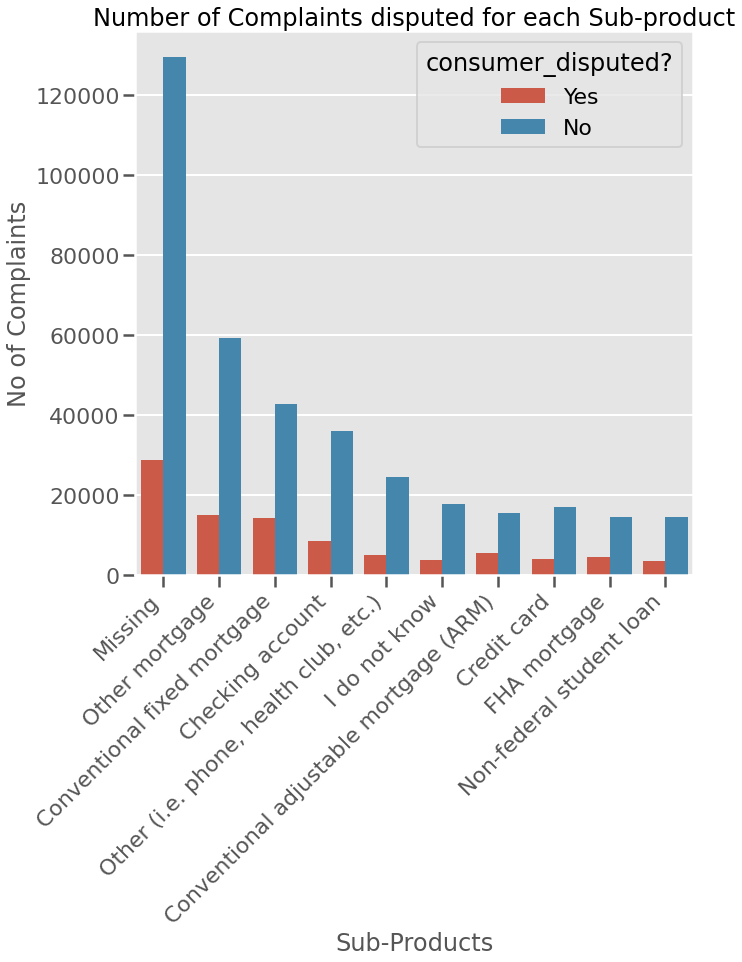

In [143]:
plot_order = dataset.groupby(['sub_product'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='sub_product',order=plot_order[0:10], hue='consumer_disputed?')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Sub-Products')
chart.set_title('Number of Complaints disputed for each Sub-product')

## Disputes

In [144]:
# Isolating complaints that lead to consumer disputes
disputes = dataset[dataset['consumer_disputed?']=='Yes']
non_disputed = dataset[dataset['consumer_disputed?']=='No']

Text(0.5, 1.0, 'Products with the most Disputed complaints')

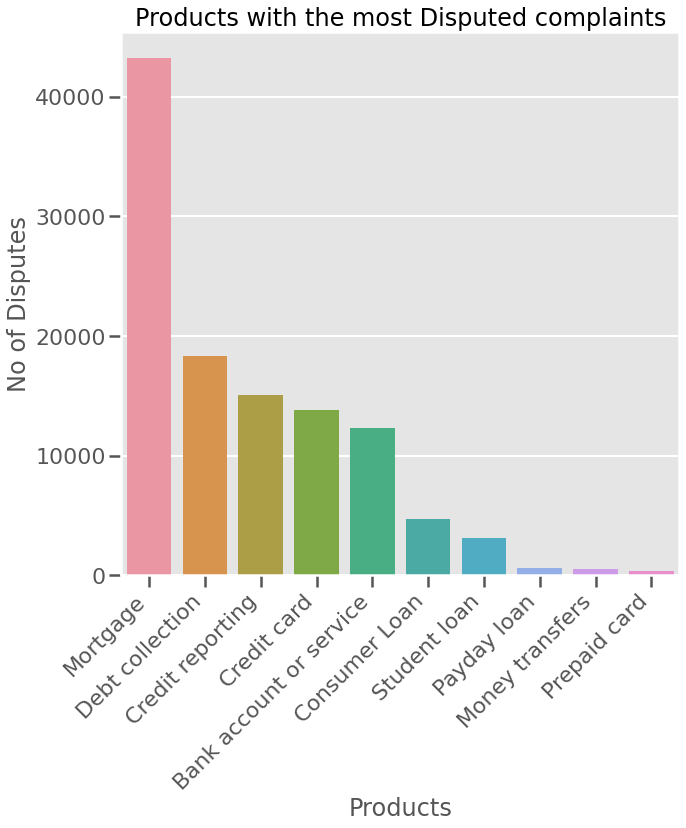

In [145]:
plot_order = disputes.groupby(['product'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=disputes, x='product', order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Disputes')
chart.set_xlabel('Products')
chart.set_title('Products with the most Disputed complaints')

Text(0.5, 1.0, 'Top 10 Disputed Issues')

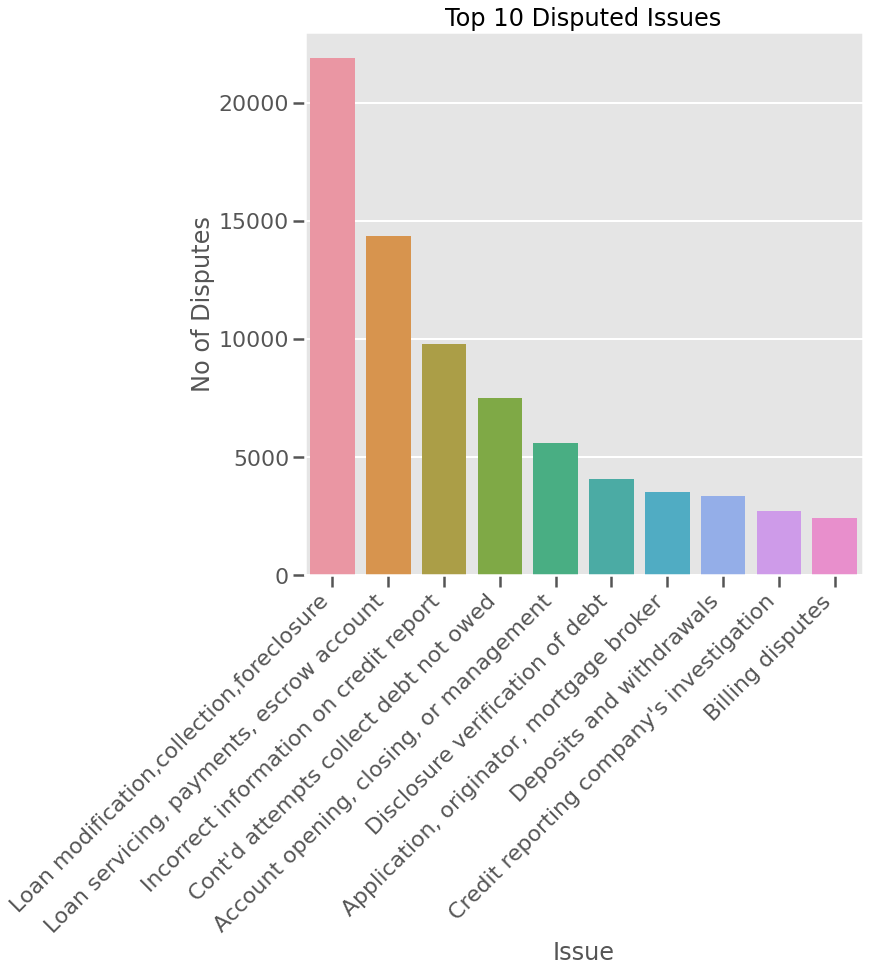

In [146]:
plot_order = disputes.groupby(['issue'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=disputes, x='issue',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Disputes')
chart.set_xlabel('Issue')
chart.set_title('Top 10 Disputed Issues')

Text(0.5, 1.0, 'Top 10 Companies with the Most Disputed Complaints')

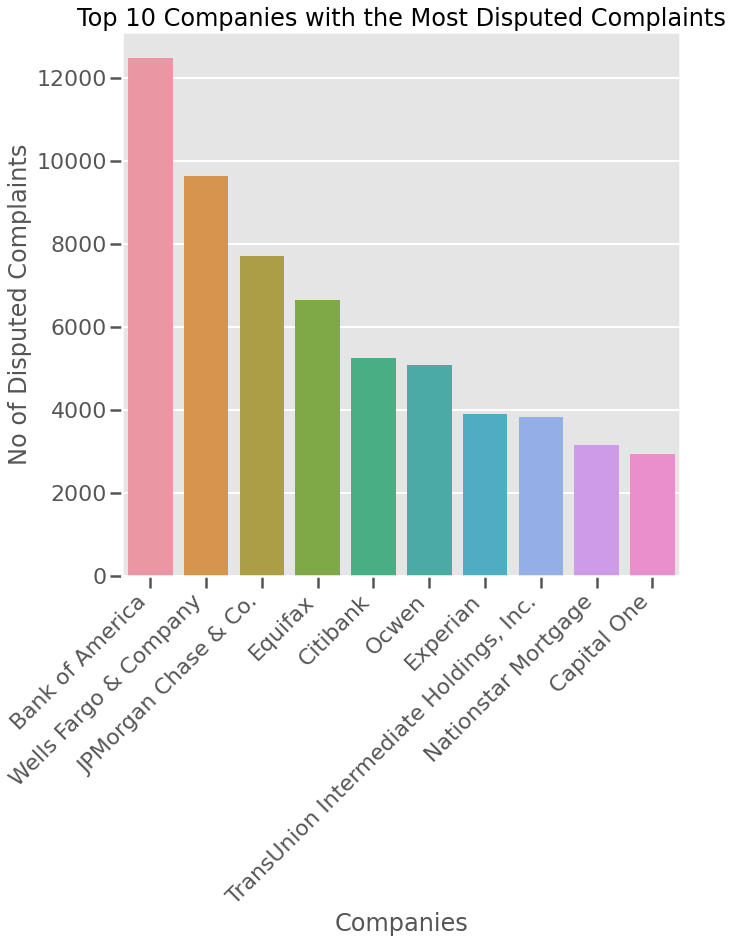

In [147]:
plot_order = disputes.groupby(['company'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=disputes, x='company',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Disputed Complaints')
chart.set_xlabel('Companies')
chart.set_title('Top 10 Companies with the Most Disputed Complaints')

The institutions with the highest number of complaints are also leading in number of consumer disputes, however, there are a few changes to the ranking such as Experian, ranked 5th in number of complaints, is ranked 7th in consumer disputes, which could point to a positive difference in Experian's customer service. 

"Mortgage-centric" institutions like Ocwen and Nationstar Mortgage show up higher in ranks, this might be due to the large amount of mortgage complaints in the consumer data

Text(0.5, 1.0, 'Number of disputes received in each month')

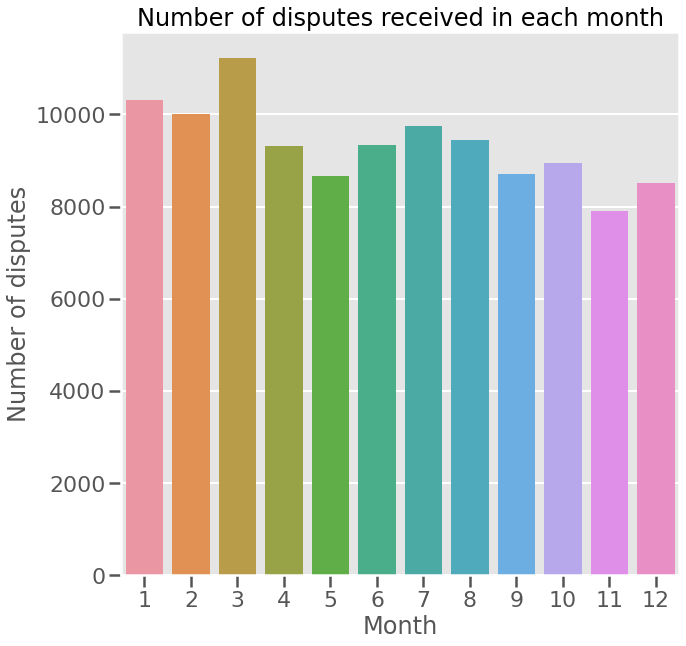

In [148]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=disputes, x='month_received')
chart.set_ylabel('Number of disputes')
chart.set_xlabel('Month')
chart.set_title('Number of disputes received in each month')

The first three months of the year are still dominant in disputed complaints as they were in total number of complaints but there is a relative reduction in April (4th month) with disputed complaints only gaining in July before tapering off again

## Best Consumer Care Experience

*Based on Number of Disputed Complaints*

In [149]:
# Isolating the number of disputed complaints and the number of complaints in general in each company
merge1= non_disputed.groupby(['company'], as_index=False)['complaint_id'].count()
merge2=dataset.groupby(['company'], as_index=False)['complaint_id'].count()
merged = merge1.merge(merge2,how='left',on='company')
merged.rename(columns={'complaint_id_x':'Non Disputed Complaints', 'complaint_id_y':'Total Complaints'}, inplace=True)
merged.sort_values(by='Non Disputed Complaints', ascending=False).head()

,company,Non Disputed Complaints,Total Complaints
426,Bank of America,43518,55998
3399,Wells Fargo & Company,32380,42024
1174,Experian,27014,30905
1698,JPMorgan Chase & Co.,26165,33881
1144,Equifax,25181,31828


In [150]:
# Limiting the dataset to companies with at least 1000 total complaints
merged=merged[merged['Total Complaints'] >= 1000]
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 43 to 3399
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   company                  57 non-null     object
 1   Non Disputed Complaints  57 non-null     int64 
 2   Total Complaints         57 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


There are 57 companies with at least 1000 complaints over the time period (2011-2016). There were over 3000 companies in the original dataset

In [151]:
merged[['Percentage']] = merged['Non Disputed Complaints']/merged['Total Complaints']
merged.sort_values('Percentage',ascending=False).head(10)

,company,Non Disputed Complaints,Total Complaints,Percentage
2112,MoneyGram,932,1011,0.921860
3158,The Western Union Company,1060,1155,0.917749
1175,"Expert Global Solutions, Inc.",1569,1734,0.904844
199,Allied Interstate LLC,1003,1119,0.896336
3206,Transworld Systems Inc.,1290,1456,0.885989
1174,Experian,27014,30905,0.874098
860,"Convergent Resources, Inc.",1156,1328,0.870482
3203,"TransUnion Intermediate Holdings, Inc.",21710,25534,0.850239
3058,Synchrony Financial,8021,9435,0.850132
1057,"Diversified Consultants, Inc.",888,1051,0.844910


Text(0.5, 1.0, 'Percentage of Non Disputed Complaints for each company')

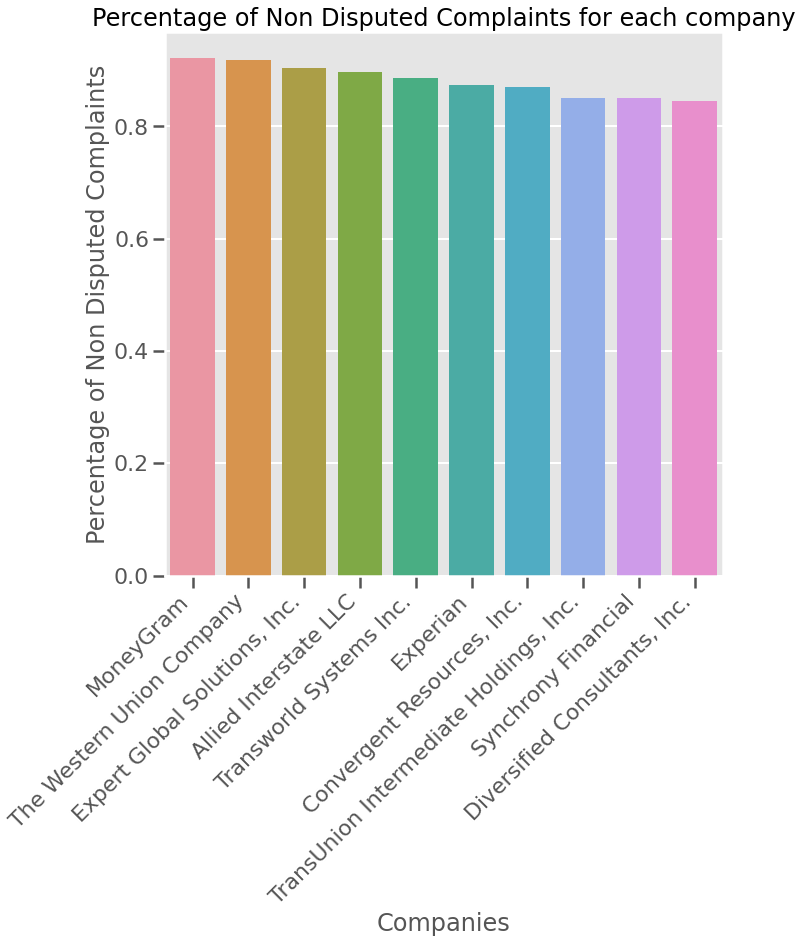

In [152]:
merged = merged.sort_values('Percentage',ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=merged,x='company',y='Percentage')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Percentage of Non Disputed Complaints')
chart.set_xlabel('Companies')
chart.set_title('Percentage of Non Disputed Complaints for each company')

While 'MoneyGram' has the best percentage of non-disputed complaints with our restrictions, its total number of complaints adds up to 1011 a paltry amount compared to Bank of America's numbers of over 30,000 complaints. However, Experian and TransUnion Intermediate Holdings hold spots on the top 10 ranking despite their over 20,000 total complaints, this highlights the customer service at these institutions

## Seasons


In [153]:
dataset['day_received'] = pd.DatetimeIndex(dataset['date_received']).day
dataset['hour_recieved'] = pd.DatetimeIndex(dataset['date_received']).hour

dataset['season'] = dataset['month_received'].apply( lambda x: 'summer' if x in [3, 4, 5] else ('spring' if x in [6, 7, 8] else('autumn' if x in [9, 10, 11] else 'winter')) )

Text(0.5, 1.0, 'Number of complaints in each season')

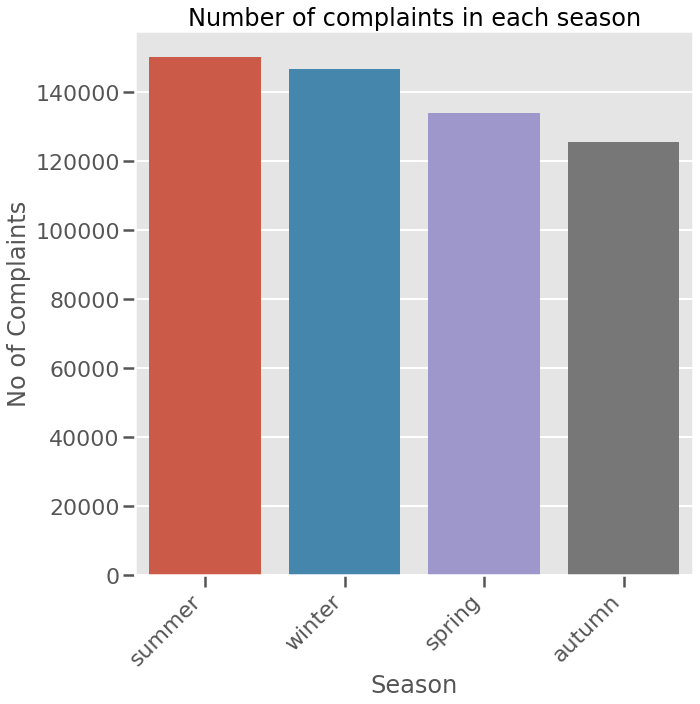

In [154]:
plot_order = dataset.groupby(['season'])['complaint_id'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=dataset, x='season',order=plot_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of Complaints')
chart.set_xlabel('Season')
chart.set_title('Number of complaints in each season')

In [155]:
dataset.groupby(['season'])['complaint_id'].count().sort_values(ascending=False)

season
summer    150075
winter    146695
spring    133809
autumn    125378
Name: complaint_id, dtype: int64

Summer is seen here to be a peak time for financial complaints, with autumn being a relatively calmer time

In [156]:
# Exploring timely responses during Holiday periods
dataset['timely_response_binary'] = dataset['timely_response'].apply(lambda x: 1 if x == 'Yes' else 0)
dataset['month_day'] = dataset['date_received'].apply(lambda x: x.strftime("%B") + ' ' + str(x.day))

us_holidays = holidays.UnitedStates()

dataset['is_holiday'] = dataset['date_received'].apply(lambda x: 1 if us_holidays.get(x.date()) else 0)
dataset['is_holiday'].value_counts()

0    549376
1      6581
Name: is_holiday, dtype: int64

Text(0.5, 1.0, 'Best companies during the holidays')

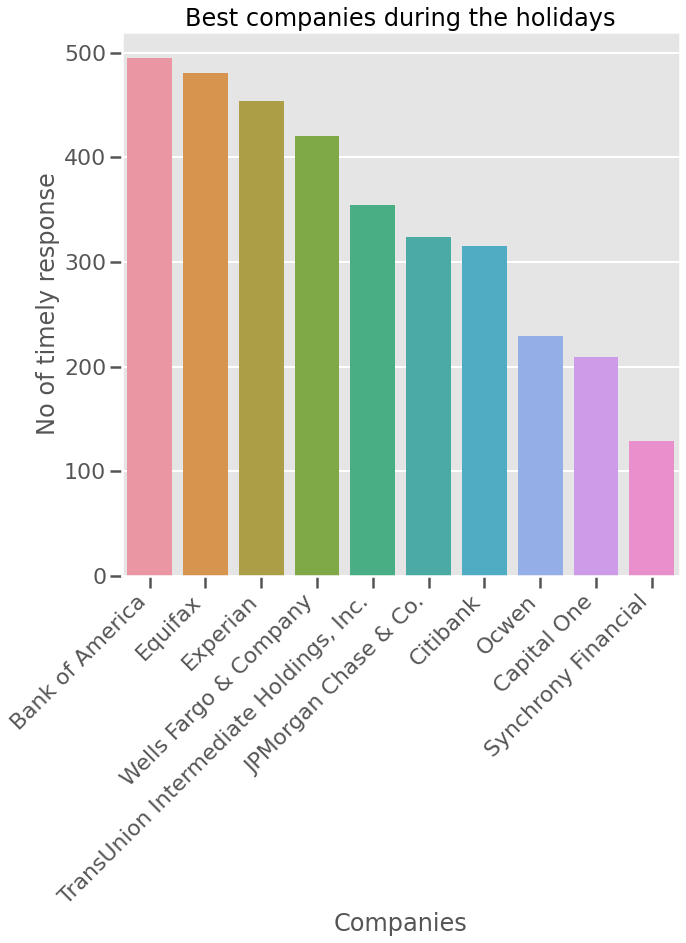

In [157]:
holiday_df = dataset[dataset['is_holiday'] == 1]

plot_order = holiday_df.groupby(['company'])['timely_response_binary'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=(10,10))
chart = sns.countplot(data=holiday_df, x='company',order=plot_order[0:10])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('No of timely response')
chart.set_xlabel('Companies')
chart.set_title('Best companies during the holidays')

### Timely responses across Seasons

In [158]:
new_df = dataset[['year_received','timely_response_binary', 'season']].groupby(['year_received', 'season'], as_index=False)['timely_response_binary'].sum()
new_df.head()

,year_received,season,timely_response_binary
0,2011,winter,2297
1,2012,autumn,17988
2,2012,spring,20725
3,2012,summer,18732
4,2012,winter,12562


Text(0.5, 1.0, 'Season wise Yearly distribution of timely response')

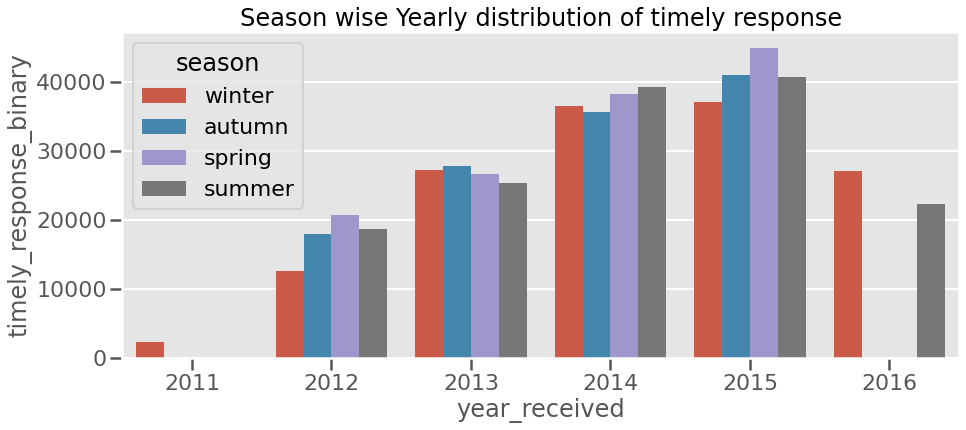

In [159]:
plt.figure(figsize=(15,6))
sns.barplot(data = new_df,  x='year_received',y='timely_response_binary',hue='season')
plt.title("Season wise Yearly distribution of timely response")

In [160]:
product_df = dataset[['year_received','timely_response_binary', 'product']].groupby(['year_received', 'product'], as_index=False)['timely_response_binary'].sum()
product_df.head()

,year_received,product,timely_response_binary
0,2011,Credit card,1184
1,2011,Mortgage,1113
2,2012,Bank account or service,11935
3,2012,Consumer Loan,1937
4,2012,Credit card,15049


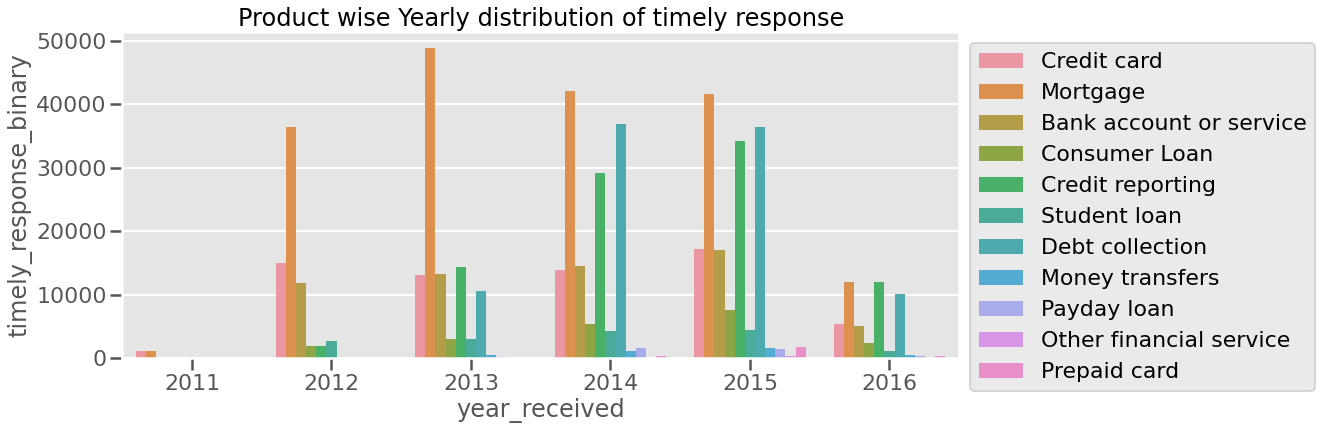

In [161]:
plt.figure(figsize=(15,6))
sns.barplot(data = product_df,  x='year_received',y='timely_response_binary',hue='product')
plt.title("Product wise Yearly distribution of timely response")
plt.legend(bbox_to_anchor=(1,1))

### Exploring time between compliants submission and time it was sent to the company

In [162]:
dataset['response_time_days'] = dataset['date_sent_to_company'] - dataset['date_received']
dataset['response_time_days_int'] = dataset['response_time_days'].apply(lambda x: int(str(x).split(' ')[0]))
time_resp_df = dataset[['complaint_id', 'season', 'response_time_days_int', 'product', 'company', 'submitted_via']]
time_resp_df.head()

,complaint_id,season,response_time_days_int,product,company,submitted_via
0,511074,spring,4,Mortgage,U.S. Bancorp,Referral
1,511080,spring,4,Mortgage,Wells Fargo & Company,Referral
2,510473,spring,19,Credit reporting,Wells Fargo & Company,Postal mail
3,510326,spring,0,Student loan,"Navient Solutions, Inc.",Email
4,511067,spring,0,Debt collection,Resurgent Capital Services L.P.,Web


In [163]:
# Limiting the dataset to companies that have had at least 1000 complaints
count = time_resp_df.groupby(['company'],as_index=False)['complaint_id'].count()
count = count[count['complaint_id'] >= 1000]
count = list(count['company'])
time_resp_df1 = time_resp_df[time_resp_df['company'].isin(count)]

In [164]:
time_resp_df1.company.nunique()

57

Text(0, 0.5, 'Response time')

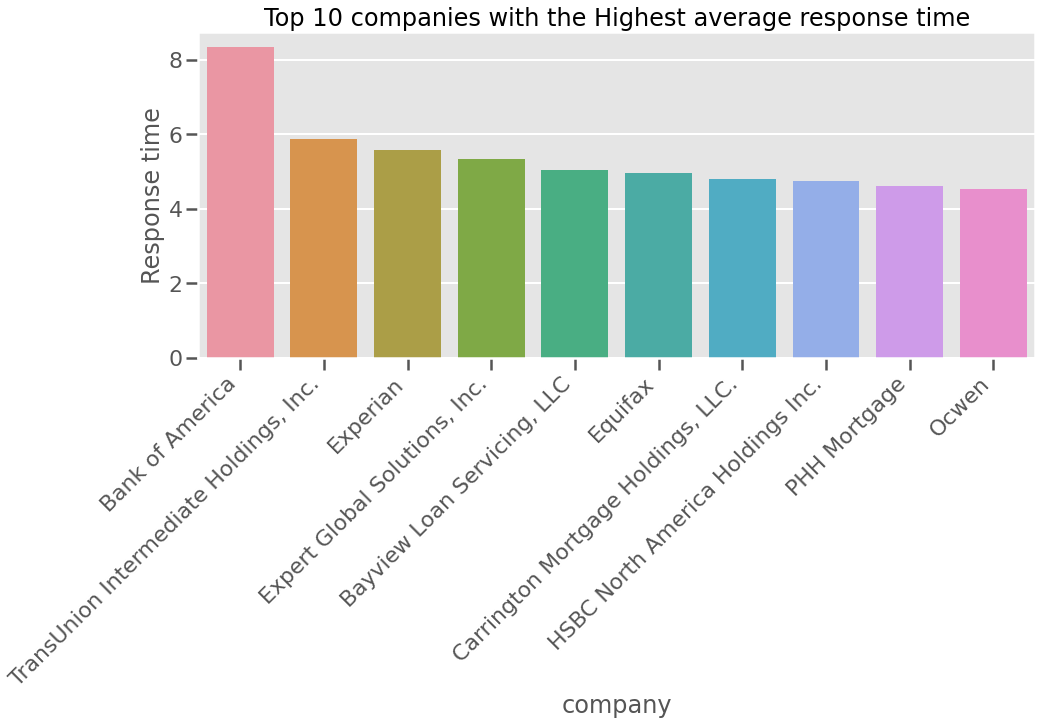

In [165]:
worst_resp = time_resp_df1[['company', 'response_time_days_int']].groupby(['company'], as_index=False)['response_time_days_int'].mean().sort_values(by = 'response_time_days_int',ascending=False)[:10]

plt.figure(figsize=(15,6))
chart = sns.barplot(data = worst_resp,  x='company',y='response_time_days_int')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Top 10 companies with the Highest average response time")
chart.set_ylabel('Response time')

Text(0.5, 1.0, 'average response time across various seasons')

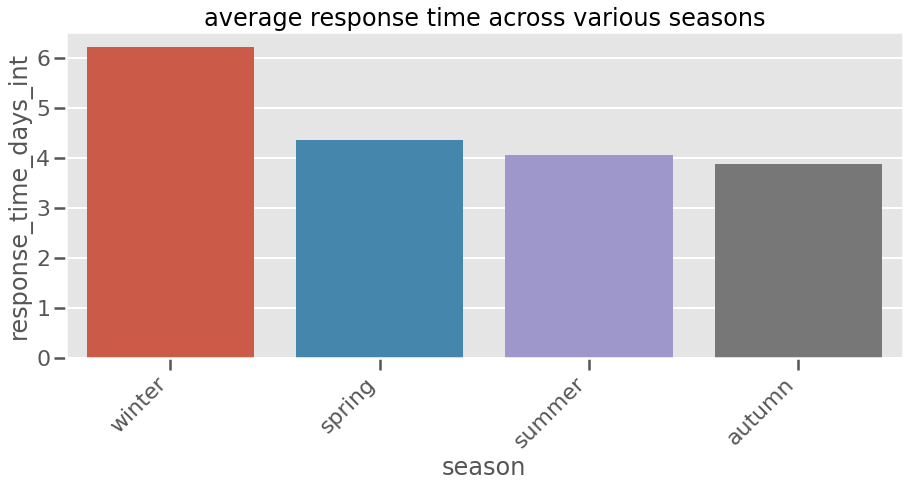

In [166]:
seasonal_resp = time_resp_df[['season', 'response_time_days_int']].groupby(['season'], as_index=False)['response_time_days_int'].mean().sort_values(by = 'response_time_days_int',ascending=False)

plt.figure(figsize=(15,6))
chart = sns.barplot(data = seasonal_resp,  x='season',y='response_time_days_int')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("average response time across various seasons")

Text(0.5, 1.0, 'average response time across various products')

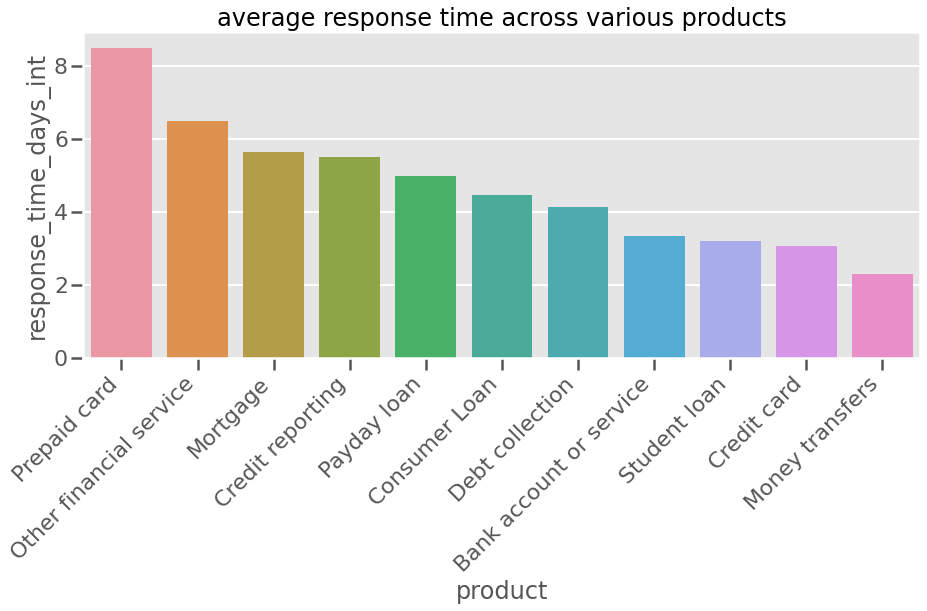

In [167]:
product_resp = time_resp_df[['product', 'response_time_days_int']].groupby(['product'], as_index=False)['response_time_days_int'].mean().sort_values(by = 'response_time_days_int',ascending=False)

plt.figure(figsize=(15,6))
chart = sns.barplot(data = product_resp,  x='product',y='response_time_days_int')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("average response time across various products")